# Stochastic Programs

This notebook, I explore chapter 15 of Introduction to Computation and Programming using Python.

In [1]:
%matplotlib inline

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')

In [12]:
def flip(n):
    heads = 0
    
    for _ in range(n):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
            
    return heads / n

## Regression to the Mean

In [6]:
def regress_to_mean(n_flips, n_trials):
    frac_heads = []
    
    for _ in range(n_trials):
        frac_heads.append(flip(n_flips))
        
    extremes = []
    next_trials = []
    
    for i, f in enumerate(frac_heads[:-1]):
        if f < 0.33 or f > 0.66:
            extremes.append(f)
            next_trials.append(frac_heads[i + 1])
            
    return extremes, next_trials

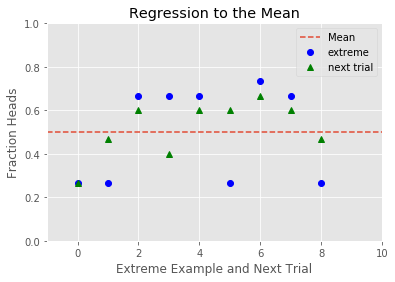

In [7]:
extremes, next_trials = regress_to_mean(15, 40)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.axhline(0.5, linestyle='--', label='Mean')
ax.plot(extremes, 'ob', label='extreme')
ax.plot(next_trials, '^g', label='next trial')
ax.set_ylim(0, 1)
ax.set_xlim(-1, len(extremes) + 1)
ax.set_title('Regression to the Mean')
ax.set_xlabel("Extreme Example and Next Trial")
ax.set_ylabel('Fraction Heads')

ax.legend(loc='best')

## Law of Larger Numbers

In [8]:
random.seed(0)
min_exp = 4
max_exp = 20

x = [2 ** i for i in range(min_exp, max_exp + 1)]
abs_diff = []
heads_to_tails = []

for n_flips in x:
    heads = 0
    tails = 0
    
    for _ in range(n_flips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
        else:
            tails += 1
    try:
        heads_to_tails.append(heads / tails)
        abs_diff.append(abs(heads - tails))
    except ZeroDivisionError:
        continue

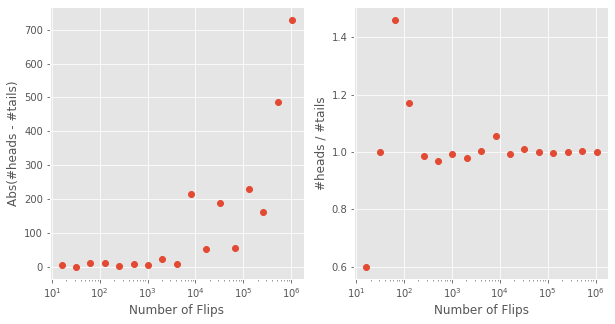

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].plot(x, abs_diff, 'o')
ax[0].set_xlabel('Number of Flips')
ax[0].set_ylabel('Abs(#heads - #tails)')
ax[0].set_xscale('log')

ax[1].plot(x, heads_to_tails, 'o')
ax[1].set_xlabel('Number of Flips')
ax[1].set_ylabel('#heads / #tails')
ax[1].set_xscale('log')


## Variane and Standard Deviation

In [10]:
def var(x):
    t = [i ** 2 for x in range()]

## Distributions

In [23]:
def flip_sim(n_flips, n_trials):
    frac_heads = []
    for _ in range(n_trials):
        frac_heads.append(flip(n_flips))
    
    mean = sum(frac_heads) / len(frac_heads)
    sd = 0#std(frac_heads)
    
    return (frac_heads, mean, sd)

In [33]:
val1, mean1, sd1 = flip_sim(100, 10000)
val2, mean2, sd2 = flip_sim(1000, 10000)

Text(0.5, 1.0, '10000 trials of 1000 flips each')

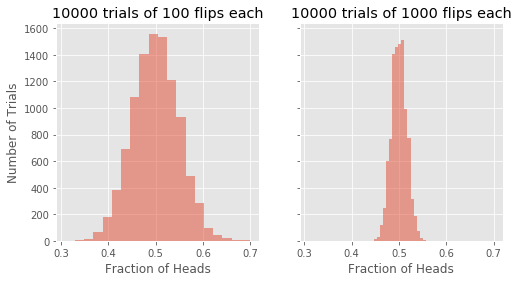

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax[0].hist(val1, bins=20, alpha=0.5)
ax[0].set_xlabel('Fraction of Heads')
ax[0].set_ylabel('Number of Trials')
ax[0].set_title('10000 trials of 100 flips each')

ax[1].hist(val2, bins=20, alpha=0.5)
ax[1].set_xlabel('Fraction of Heads')
ax[1].set_title('10000 trials of 1000 flips each')

### Normal Distribution

#### Integrating with Scipy

In [57]:
import math
import scipy.integrate

In [56]:
scipy.integrate.quad(abs, 0, 5) # -> area, error

(12.5, 1.3877787807814457e-13)

In [67]:
def gaussian(x, mu, sigma):
    return (1/(sigma * (2 * math.pi) ** 0.5)) * math.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

In [66]:
print('Porbability of being withing 1 std:', scipy.integrate.quad(gaussian, -1, 1, (0, 1)))
print('Porbability of being withing 2 std:', scipy.integrate.quad(gaussian, -2, 2, (0, 1)))
print('Porbability of being withing 3 std:', scipy.integrate.quad(gaussian, -3, 3, (0, 1)))

Porbability of being withing 1 std: (0.682689492137086, 7.579375928402476e-15)
Porbability of being withing 2 std: (0.9544997361036417, 1.8403560456416157e-11)
Porbability of being withing 3 std: (0.9973002039367399, 1.1072256503105314e-14)
